# Basics and setting up IBMQ account

In [1]:
from qiskit import IBMQ

#token = open('/Users/gshyam/projects/work_projects/machine_learning/ANPA_dataScience/Python2020/TOKEN_BMQ','r')
#print (token)
#IBMQ.save_account(token)


#IBMQ.save_account('dbf31c5ec55e2b7914fe280fe04980f4edd8efa6063471bd9bc4e3617e7cc8348819917b6a01a4e106d8ef02c33f9abbf2920ceb9bbe44056eaec59eb1e910d3')

In [15]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute, BasicAer
from qiskit.visualization import plot_bloch_multivector

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import qiskit
print (qiskit.__version__)
print (qiskit.__qiskit_version__)

0.12.0
{'qiskit-terra': '0.12.0', 'qiskit-aer': '0.4.1', 'qiskit-ignis': '0.2.0', 'qiskit-ibmq-provider': '0.5.0', 'qiskit-aqua': '0.6.5', 'qiskit': '0.16.2'}


In [4]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [5]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_rome') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [6]:
for backend in provider.backends():
    print(backend.status())

BackendStatus(backend_name='ibmq_qasm_simulator', backend_version='0.1.547', operational=True, pending_jobs=3, status_msg='active')
BackendStatus(backend_name='ibmqx2', backend_version='2.0.5', operational=True, pending_jobs=3, status_msg='active')
BackendStatus(backend_name='ibmq_16_melbourne', backend_version='2.1.0', operational=True, pending_jobs=5, status_msg='active')
BackendStatus(backend_name='ibmq_vigo', backend_version='1.0.2', operational=True, pending_jobs=58, status_msg='active')
BackendStatus(backend_name='ibmq_ourense', backend_version='1.0.1', operational=True, pending_jobs=6, status_msg='active')
BackendStatus(backend_name='ibmq_london', backend_version='1.1.0', operational=True, pending_jobs=25, status_msg='active')
BackendStatus(backend_name='ibmq_burlington', backend_version='1.1.4', operational=True, pending_jobs=5, status_msg='active')
BackendStatus(backend_name='ibmq_essex', backend_version='1.0.1', operational=True, pending_jobs=2, status_msg='active')
BackendSt

In [7]:
real_device = provider.get_backend('ibmq_16_melbourne')

In [8]:
properties = real_device.properties()
coupling_map = real_device.configuration().coupling_map

In [9]:
from qiskit.providers.aer.noise import NoiseModel
noise_model = NoiseModel.from_backend(properties)

In [10]:
qc = QuantumCircuit(2,2)
qc.x(1)  # CNOT gate converts (00)
qc.measure(0,0)
qc.measure(1,1)


simulator = Aer.get_backend('qasm_simulator')

job = execute(qc, simulator, shots=1024, noise_model=noise_model,
                    coupling_map=coupling_map,
                    basis_gates=noise_model.basis_gates)

job.result().get_counts()

{'11': 10, '01': 1, '00': 60, '10': 953}

## 4. Example Creating an Adder Circuit

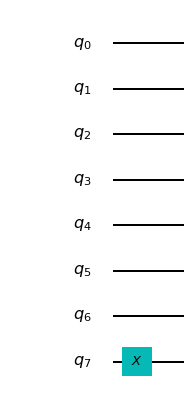

In [11]:
n=8
qc_encode = QuantumCircuit(n)
qc_encode.x(7)

qc_encode.draw(output='mpl')

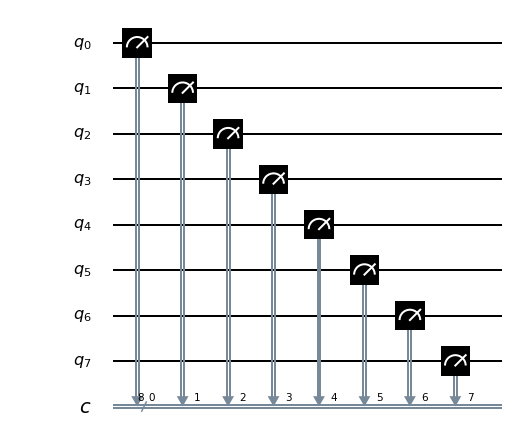

In [12]:
qc_output = QuantumCircuit(n, n)
for j in range(n):
    qc_output.measure(j,j)
qc_output.draw(output='mpl')

In [16]:
job = execute(qc_output, Aer.get_backend('quasm_simulator'))#.result().get_counts()

QiskitBackendNotFoundError: 'No backend matches the criteria'